In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import animation
import random
import pylab

In [2]:
def alpha_sample(x_0,alpha,n,burnin):
    
    samples = np.array([x_0])
    X = x_0
    
    for i in range(n):
        X = alpha*X + (1-alpha)*np.random.normal(1)
        samples = np.append(samples,X)
        
    samples = samples[burnin:]   
    return(samples)   

In [3]:
#finding the correlations

def correlation(sample):
    avg = np.average(sample)
    n_array = sample.size-np.arange(sample.size)
    tmp = np.correlate(sample,sample,mode='full')
    result = tmp[tmp.size//2:]*1./n_array-avg**2
    vec = result/result[0]
    return(vec)

def IACT(sample,window):
    vec = correlation(sample)
    iact = 1+2*sum(vec[1:window])
    return(iact)

def alpha_theory_IACT(alpha):
    return((1+alpha)/(1-alpha))

In [4]:
#for alpha=0.2
samples = alpha_sample(0,0.2,100000,100)

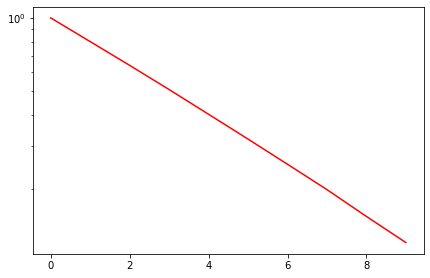

In [22]:
corr = correlation(samples)

fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(corr[:10] ,color='red')

ax.set_yscale('log')
#ax.legend()

pylab.show()

#save both a trimmed to 1000 and trimmed to just the first exponential decay

In [ ]:
#the trimmed image suggests a window of around 3

In [9]:
print(IACT(samples,3))
print(alpha_theory_IACT(0.2))

1.4699533965022518
1.4999999999999998


In [10]:
#for alpha =0.5
samples = alpha_sample(0,0.5,100000,100)

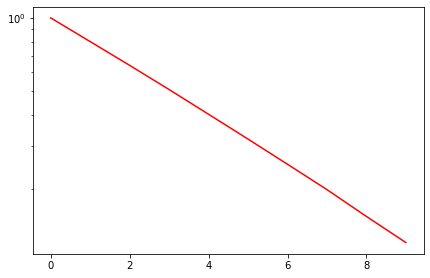

In [21]:
corr = correlation(samples)

fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(corr[:10] ,color='red')
#line2, = ax.plot(np.zeros(10),color='black')

ax.set_yscale('log')
#ax.legend()

pylab.show()

#save both a trimmed to 1000 and trimmed to just the first exponential decay

In [ ]:
#the trimmed image suggests a window of around 7

In [12]:
print(IACT(samples,7))
print(alpha_theory_IACT(0.5))
#seems decent

2.947868799060408
3.0


In [13]:
#for alpha =0.8
samples = alpha_sample(0,0.8,100000,100)

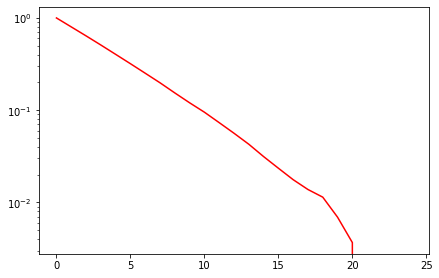

In [18]:
corr = correlation(samples)

fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(corr[:25] ,color='red')

ax.set_yscale('log')
#ax.legend()

pylab.show()

#save both a trimmed to 100 and trimmed to just the first exponential decay

In [19]:
#suggests a window of around 20?

print(IACT(samples,20))
print(alpha_theory_IACT(0.8))
#seems decent

8.530827531374921
9.000000000000002
